In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from textblob import TextBlob

In [22]:
plt.style.use('seaborn-v0_8-muted')

# Importing data

In [23]:
tfidf = pd.read_csv('tfidf_w_sentiment.csv', index_col = 0)
data = pd.read_csv('mbti_1.csv')

In [24]:
mapper = {'anger':'anger_e',
          'fear':'fear_e',
          'joy':'joy_e',
          'love.1':'love_e',
          'sadness':'sadness_e',
          'surprise':'surprise_e'}

tfidf.rename(mapper = mapper, axis = 1, inplace = True)
tfidf.head()

,about,all,also,always,an,and,at,be,because,but,...,you,your,youre,label,anger_e,fear_e,joy_e,love_e,sadness_e,surprise_e
0,0.022628,0.091254,0.000000,0.027837,0.067843,0.264456,0.068314,0.374517,0.073364,0.000000,...,0.132503,0.184626,0.031418,INFJ,0.135764,0.117830,0.323762,0.081149,0.303030,0.038466
1,0.020793,0.031446,0.037442,0.025580,0.093516,0.334151,0.031388,0.394769,0.033708,0.040718,...,0.223230,0.053019,0.057743,ENTP,0.138154,0.115532,0.322613,0.088840,0.297431,0.037430
2,0.058417,0.014724,0.000000,0.053899,0.072980,0.256030,0.044092,0.455007,0.047351,0.071498,...,0.185295,0.104267,0.060834,INTP,0.129505,0.116293,0.352338,0.078601,0.282931,0.040332
3,0.062748,0.063264,0.050216,0.000000,0.031356,0.162968,0.010525,0.539645,0.045209,0.071678,...,0.173513,0.063998,0.087125,INTJ,0.145261,0.123895,0.317924,0.076562,0.293479,0.042879
4,0.031435,0.042258,0.012579,0.012891,0.031417,0.214315,0.021090,0.683529,0.045298,0.061558,...,0.163626,0.021374,0.014549,ENTJ,0.141940,0.126254,0.327624,0.075333,0.290540,0.038309


In [25]:
# Defining subsets for later use
intp = data[data['type'] == 'INTP']
istp = data[data['type'] == 'ISTP']
entp = data[data['type'] == 'ENTP']
enfp = data[data['type'] == 'ENFP']
isfp = data[data['type'] == 'ISFP']
infp = data[data['type'] == 'INFP']
intj = data[data['type'] == 'INTJ']
infj = data[data['type'] == 'INFJ']
estj = data[data['type'] == 'ESTJ']
entj = data[data['type'] == 'ENTJ']
esfj = data[data['type'] == 'ESFJ']
enfj = data[data['type'] == 'ENFJ']
istj = data[data['type'] == 'ISTJ']
isfj = data[data['type'] == 'ISFJ']
estp = data[data['type'] == 'ESTP']
esfp = data[data['type'] == 'ESFP']

mbtis = ['intp','istp','entp','enfp','isfp','infp','intj','infj',
         'estj','entj','esfj','enfj','istj','isfj','estp','esfp']

posts_bytype = [intp, istp, entp, enfp, isfp, infp, intj, infj,
                estj, entj, esfj, enfj, istj, isfj, estp, esfp]

mbtis_cap = ['INTP','ISTP','ENTP','ENFP','ISFP','INFP','INTJ','INFJ',
             'ESTJ','ENTJ','ESFJ','ENFJ','ISTJ','ISFJ','ESTP','ESFP']

In [27]:
tfidf['polarity'] = ''
tfidf['subjectivity'] = ''

warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

for i in range(len(tfidf.index)):
    p = TextBlob(data.posts[i]).sentiment[0]
    tfidf['polarity'][i] = p
    
    s = TextBlob(data.posts[i]).sentiment[1]
    tfidf['subjectivity'][i] = s
    
tfidf.head()

,about,all,also,always,an,and,at,be,because,but,...,youre,label,anger_e,fear_e,joy_e,love_e,sadness_e,surprise_e,polarity,subjectivity
0,0.022628,0.091254,0.000000,0.027837,0.067843,0.264456,0.068314,0.374517,0.073364,0.000000,...,0.031418,INFJ,0.135764,0.117830,0.323762,0.081149,0.303030,0.038466,0.145127,0.469713
1,0.020793,0.031446,0.037442,0.025580,0.093516,0.334151,0.031388,0.394769,0.033708,0.040718,...,0.057743,ENTP,0.138154,0.115532,0.322613,0.088840,0.297431,0.037430,0.163282,0.545346
2,0.058417,0.014724,0.000000,0.053899,0.072980,0.256030,0.044092,0.455007,0.047351,0.071498,...,0.060834,INTP,0.129505,0.116293,0.352338,0.078601,0.282931,0.040332,0.174137,0.618252
3,0.062748,0.063264,0.050216,0.000000,0.031356,0.162968,0.010525,0.539645,0.045209,0.071678,...,0.087125,INTJ,0.145261,0.123895,0.317924,0.076562,0.293479,0.042879,0.114959,0.524975
4,0.031435,0.042258,0.012579,0.012891,0.031417,0.214315,0.021090,0.683529,0.045298,0.061558,...,0.014549,ENTJ,0.141940,0.126254,0.327624,0.075333,0.290540,0.038309,0.056805,0.52643


In [28]:
encoded_label_df = pd.get_dummies(tfidf.label) * 1.0
tfidf = pd.concat([tfidf, encoded_label_df], axis = 1)

tfidf.head()

,about,all,also,always,an,and,at,be,because,but,...,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,0.022628,0.091254,0.000000,0.027837,0.067843,0.264456,0.068314,0.374517,0.073364,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.020793,0.031446,0.037442,0.025580,0.093516,0.334151,0.031388,0.394769,0.033708,0.040718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.058417,0.014724,0.000000,0.053899,0.072980,0.256030,0.044092,0.455007,0.047351,0.071498,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.062748,0.063264,0.050216,0.000000,0.031356,0.162968,0.010525,0.539645,0.045209,0.071678,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.031435,0.042258,0.012579,0.012891,0.031417,0.214315,0.021090,0.683529,0.045298,0.061558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Preprocessing - Class normalization

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Class normalization
tfidf_bal = pd.concat([tfidf, encoded_label_df], axis = 1)
mean_class_size = int(sum([len(cls) for cls in posts_bytype]) / len(posts_bytype))

downsampled_data = []
upsampled_data = []
c = .99 # Coefficient for class normalization

# Loop through each MBTI dataset
for i in range(len(posts_bytype)):
    # Define class size
    class_size = len(posts_bytype[i])
    # Calculate difference between class size and mean class size
    difference = abs(class_size - mean_class_size)
    # Calculate balancing margin
    k = c * difference
    
    # For majority classes
    if class_size > mean_class_size:
        # Calculate normalized class size
        norm_class_size = int(class_size - k)
        # Downsample
        re_sample = resample(posts_bytype[i], replace = False, n_samples = norm_class_size,
                             random_state = 17)
        # Append downsampled data of current class to list
        downsampled_data.append(re_sample)
        
    # For minority classes
    else:
        # Calculate normalized class size
        norm_class_size = int(class_size + k)
        # Upsample with replacement
        re_sample = resample(posts_bytype[i], replace = True, n_samples = norm_class_size,
                             random_state = 17)
        # Append upsampled data for current class to list of DataFrames
        upsampled_data.append(re_sample)

In [30]:
# Concatenate all downsampled data
downsampled_data_df = pd.concat(downsampled_data)
# Ensure no accidental duplicates
downsampled_data_df.index.is_unique

True

In [31]:
# Manually append upsampled data to list (resampled with replacement)
upsampled_ls = []

# Loop through dataframes of upsampled classes
for upsampled_class in upsampled_data:
    # Loop through dataframe by index
    for i in upsampled_class.index:
        # Sample to add
        new_sample = tfidf_bal.loc[[i]]
        # Append new sample to list of Series
        upsampled_ls.append(new_sample)
        
upsampled_ls[0].index

Index([2674], dtype='int64')

In [32]:
# Concatenate upsampled data
upsampled_df = pd.concat(upsampled_ls, ignore_index = True)
# Use downsampled data index to subset tfidf dataframe
downsampled_df = tfidf_bal[tfidf_bal.index.isin(downsampled_data_df.index)]
#downsampled_df = downsampled_df.reset_index(drop = True)
downsampled_df.index.is_unique

True

In [33]:
# Concatenate upsampled and downsampled data
df = pd.concat([upsampled_df, downsampled_df], axis = 0, ignore_index = True)
df.head()

,about,all,also,always,an,and,at,be,because,but,...,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,0.055003,0.034660,0.033014,0.000000,0.089329,0.241067,0.062273,0.461886,0.014861,0.040391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.036352,0.014660,0.008728,0.000000,0.021798,0.368206,0.051216,0.537962,0.007857,0.042711,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.021015,0.021188,0.025228,0.000000,0.042006,0.347953,0.074022,0.255759,0.045424,0.164613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.052516,0.061772,0.073549,0.010768,0.052486,0.349509,0.052850,0.255650,0.028378,0.059989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.068785,0.011558,0.041286,0.028207,0.148947,0.312632,0.092296,0.479947,0.000000,0.157147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Preprocessing - Train/test split

In [34]:
# Create X and y, where X is all data except label & types and y is encoded types
X = df.drop(['label'] + mbtis_cap, axis = 1)
y = df.iloc[:,-16:]

print(X.shape, y.shape)

(8664, 108) (8664, 16)


In [35]:
# Full train/test split (only for final model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y,
                                                    random_state = 17)

# Train/test split for model selection and tuning
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size = .2,
                                                        stratify = y_train, random_state = 17)

# Model selection - Initial tests

In [36]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, random_state = 17)
rf.fit(X_train2, y_train2)

print("Random Forest, untuned")
print(f"Accuracy on train set: {rf.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {rf.score(X_test2, y_test2):.4f}")

Random Forest, untuned
Accuracy on train set: 0.9996
Accuracy on test set: 0.5357


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train2, y_train2)

print("K-nearest neighbors, untuned")
print(f"Accuracy on train set: {knn.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {knn.score(X_test2, y_test2):.4f}")

K-nearest neighbors, untuned
Accuracy on train set: 0.4562
Accuracy on test set: 0.3353


In [38]:
# Dropping polarity for Naive Bayes
X_train_mnb = X_train2.drop('polarity', axis = 1)
X_test_mnb = X_test2.drop('polarity', axis = 1)

# Single value target for Naive Bayes
y_train_mnb = y_train2.apply(lambda x: x.idxmax(), axis = 1).reset_index(drop = True)
y_test_mnb = y_test2.apply(lambda x: x.idxmax(), axis = 1).reset_index(drop = True)

In [39]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_mnb, y_train_mnb)

print("Multinomial Naive Bayes, untuned")
print(f"Accuracy on train set: {mnb.score(X_train_mnb, y_train_mnb):.4f}")
print(f"Accuracy on test set: {mnb.score(X_test_mnb, y_test_mnb):.4f}")

Multinomial Naive Bayes, untuned
Accuracy on train set: 0.2329
Accuracy on test set: 0.2062


Possibly too complex for MNB.

In [40]:
from sklearn.neural_network import MLPClassifier

nnet = MLPClassifier(max_iter = 10000)
nnet.fit(X_train2, y_train2)

print("Multilayer perceptron classifier, untuned")
print(f"Accuracy on train set: {nnet.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet.score(X_test2, y_test2):.4f}")

Multilayer perceptron classifier, untuned
Accuracy on train set: 0.7202
Accuracy on test set: 0.5227


In [41]:
nnet.n_iter_

2561

Random Forest and MLP classifier are the best! Hyperparameter tuning for both

# Hyperparameter tuning - RF and MLP

## RF probability predictions

In [42]:
class_names = tfidf.columns[-16:]

rf_probs = rf.fit(X_train2, y_train_mnb)

probs = rf_probs.predict_proba(X_test2)
probs_array = np.array(probs)

rf_probs_df = pd.DataFrame(probs_array, columns = class_names)
rf_probs_df['y_pred'] = rf_probs.predict(X_test2)
rf_probs_df['true'] = y_test_mnb
rf_probs_df

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,y_pred,true
0,0.03,0.14,0.03,0.03,0.05,0.00,0.00,0.02,0.15,0.10,0.07,0.11,0.06,0.11,0.07,0.03,INFJ,INTJ
1,0.04,0.07,0.07,0.13,0.01,0.00,0.01,0.05,0.12,0.11,0.12,0.09,0.02,0.03,0.05,0.08,ENTP,INTP
2,0.03,0.11,0.04,0.09,0.01,0.03,0.02,0.07,0.03,0.05,0.11,0.06,0.08,0.06,0.02,0.19,ISTP,INFP
3,0.00,0.03,0.07,0.04,0.03,0.01,0.00,0.03,0.10,0.19,0.18,0.08,0.03,0.06,0.10,0.05,INFP,INTJ
4,0.07,0.08,0.06,0.05,0.01,0.03,0.00,0.05,0.06,0.08,0.06,0.12,0.06,0.09,0.10,0.08,INTP,INFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0.00,0.00,0.00,0.00,0.99,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,ESFJ,ESFJ
1383,0.04,0.07,0.13,0.12,0.00,0.00,0.02,0.03,0.07,0.01,0.18,0.18,0.02,0.03,0.05,0.05,INTJ,INTJ
1384,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,ESTP,ESTP
1385,0.00,0.00,0.00,0.00,0.00,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,ESFP,ESFP


## MLP probability predictions

In [43]:
nnet_probs = nnet.fit(X_train2, y_train_mnb)

probs = nnet_probs.predict_proba(X_test2)
probs_array = np.array(np.round(probs, 2))

nnet_probs_df = pd.DataFrame(probs_array, columns = class_names)
nnet_probs_df['y_pred'] = nnet_probs.predict(X_test2)
nnet_probs_df['true'] = y_test_mnb
nnet_probs_df

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,y_pred,true
0,0.85,0.04,0.00,0.01,0.0,0.00,0.0,0.00,0.03,0.05,0.00,0.01,0.00,0.01,0.0,0.00,ENFJ,INTJ
1,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,ISTJ,INTP
2,0.00,0.00,0.00,0.03,0.0,0.00,0.0,0.53,0.01,0.00,0.26,0.13,0.00,0.01,0.0,0.03,ESTP,INFP
3,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.81,0.13,0.04,0.01,0.00,0.00,0.0,0.00,INFJ,INTJ
4,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.99,0.00,0.00,0.00,0.01,0.00,0.0,0.00,INFJ,INFJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0.00,0.00,0.00,0.00,1.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,ESFJ,ESFJ
1383,0.00,0.00,0.00,0.03,0.0,0.00,0.0,0.00,0.00,0.00,0.80,0.11,0.00,0.00,0.0,0.04,INTJ,INTJ
1384,0.00,0.00,0.00,0.00,0.0,0.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,ESTP,ESTP
1385,0.00,0.00,0.00,0.00,0.0,0.96,0.0,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.0,0.00,ESFP,ESFP


## Grid searches

### Random Forest

In [50]:
from sklearn.model_selection import GridSearchCV

# Random Forest hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt'],
              'bootstrap': [True, False]}

rf_gs = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1)
rf_gs.fit(X_train, y_train)

print("Best parameters found:", rf_gs.best_params_)
print("Best cross-validation score:", rf_gs.best_score_)

/Users/ali/anaconda3/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.540755791512821


Random Forest:
Best parameters found: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.5408

In [51]:
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train2, y_train2)

print("Random Forest, tuned")
print(f"Accuracy on train set: {rf.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {rf.score(X_test2, y_test2):.4f}")

Random Forest, tuned
Accuracy on train set: 1.0000
Accuracy on test set: 0.5357


### MLP Classifier

In [ ]:
# MLP Classifier hyperparameter tuning
param_grid = {'hidden_layer_sizes': [100, 200, 300], # Mistake
              'activation': ['relu', 'tanh'],
              'solver': ['adam', 'sgd'],
              'alpha': [0.0001, 0.001, 0.01],
              'learning_rate': ['constant', 'adaptive']}

nnet = MLPClassifier(max_iter = 10000, random_state = 17)

nnet_gs = GridSearchCV(estimator = nnet, param_grid = param_grid, cv = 5, n_jobs = -1)
nnet_gs.fit(X_train, y_train)

print("Best parameters found:", nnet_gs.best_params_)
print("Best cross-validation score:", nnet_gs.best_score_)

MLP classifier:
Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 300, 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score: 0.5765

In [54]:
# Trying best params with higher max iterations
nnet = MLPClassifier(max_iter = 15000, hidden_layer_sizes = 300, random_state = 17)
nnet.fit(X_train2, y_train2)

print("Multilayer perceptron classifier, tuned")
print(f"Accuracy on train set: {nnet.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet.score(X_test2, y_test2):.4f}")

Multilayer perceptron classifier, tuned
Accuracy on train set: 1.0000
Accuracy on test set: 0.5616


In [55]:
# Trying grid search again with higher max iterations
param_grid = {'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50)],
              'activation': ['relu', 'tanh'],
              'solver': ['adam', 'sgd'],
              'alpha': [0.0001, 0.001, 0.01],
              'learning_rate': ['constant', 'adaptive']}

nnet_gs = GridSearchCV(estimator = nnet, param_grid = param_grid, cv = 3, n_jobs = -1)
nnet_gs.fit(X_train, y_train)

print("Best parameters found:", nnet_gs.best_params_)
print("Best cross-validation score:", nnet_gs.best_score_)

Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validation score: 0.5305121437531649


In [56]:
# Testing again with new params
nnet = MLPClassifier(max_iter = 15000, hidden_layer_sizes = (100,50), random_state = 17)
nnet.fit(X_train2, y_train2)

print("Multilayer perceptron classifier, tuned")
print(f"Accuracy on train set: {nnet.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet.score(X_test2, y_test2):.4f}")

Multilayer perceptron classifier, tuned
Accuracy on train set: 0.7897
Accuracy on test set: 0.5797


Underfit, try adding one more hidden layer?

In [57]:
nnet = MLPClassifier(max_iter = 15000, hidden_layer_sizes = (100,50,50), random_state = 17)
nnet.fit(X_train2, y_train2)

print("Multilayer perceptron classifier, 3 hidden layers")
print(f"Accuracy on train set: {nnet.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet.score(X_test2, y_test2):.4f}")

Multilayer perceptron classifier, 3 hidden layers
Accuracy on train set: 0.8350
Accuracy on test set: 0.5616


Adding another hidden layer (50) improved the fit but worsened performance. Try increasing size of second layer?

In [58]:
nnet = MLPClassifier(max_iter = 15000, hidden_layer_sizes = (100,100,50), random_state = 17)
nnet.fit(X_train2, y_train2)

print("Multilayer perceptron classifier, (100,100,50)")
print(f"Accuracy on train set: {nnet.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet.score(X_test2, y_test2):.4f}")

Multilayer perceptron classifier, (100,100,50)
Accuracy on train set: 0.9901
Accuracy on test set: 0.5652


Better. Try increasing size of third layer, try adding a fourth layer.

In [59]:
nnet1 = MLPClassifier(max_iter = 15000, hidden_layer_sizes = (100,100,100), random_state = 17)
nnet1.fit(X_train2, y_train2)

print("nnet1: Multilayer perceptron classifier, (100,100,100)")
print(f"Accuracy on train set: {nnet1.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet1.score(X_test2, y_test2):.4f}")

nnet2 = MLPClassifier(max_iter = 15000, hidden_layer_sizes = (100,100,50,50), random_state = 17)
nnet2.fit(X_train2, y_train2)

print("nnet2: Multilayer perceptron classifier, (100,100,50,50)")
print(f"Accuracy on train set: {nnet2.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet2.score(X_test2, y_test2):.4f}")

nnet1: Multilayer perceptron classifier, (100,100,100)
Accuracy on train set: 1.0000
Accuracy on test set: 0.5674
nnet2: Multilayer perceptron classifier, (100,100,50,50)
Accuracy on train set: 0.8126
Accuracy on test set: 0.5588


4-layer network?

In [60]:
nnet = MLPClassifier(max_iter = 15000, hidden_layer_sizes = (100,100,100,100), random_state = 17)
nnet.fit(X_train2, y_train2)

print("Multilayer perceptron classifier, (100,100,100,100)")
print(f"Accuracy on train set: {nnet1.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet1.score(X_test2, y_test2):.4f}")

Multilayer perceptron classifier, (100,100,100,100)
Accuracy on train set: 1.0000
Accuracy on test set: 0.5674


No improvement when increasing complexity beyond 3 hidden layers.

In [ ]:
# Grid search on the 2-layer (100,50) and 3-layer (100,100,100) options
nnet = MLPClassifier(random_state = 17)

param_grid = {'hidden_layer_sizes': [(100,50),(100,100,100)],
              'activation': ['relu', 'tanh', 'logistic'],
              'solver': ['adam', 'sgd', 'lbfgs'],
              'alpha': [0.0001, 0.001, 0.01],
              'learning_rate': ['constant', 'adaptive', 'invscaling'],
              'max_iter': [2500, 10000, 15000],
              'early_stopping': [True, False]}

nnet_gs = GridSearchCV(estimator = nnet, param_grid = param_grid, cv = 3, n_jobs = -1)
nnet_gs.fit(X_train, y_train)

print("Best parameters found:", nnet_gs.best_params_)
print("Best cross-validation score:", nnet_gs.best_score_)

Best parameters found: {'activation': 'tanh', 'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': (100, 100, 100), 'learning_rate': 'constant', 'max_iter': 2500, 'solver': 'lbfgs'}
Best cross-validation score: 0.5525878179707692

In [63]:
nnet1 = MLPClassifier(hidden_layer_sizes = (100,100,100), activation = 'tanh', solver = 'lbfgs',
                     alpha = .01, max_iter = 2500, early_stopping = True, random_state = 17)
nnet1.fit(X_train2, y_train2)

print("Multilayer perceptron classifier, final")
print(f"Accuracy on train set: {nnet1.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet1.score(X_test2, y_test2):.4f}")

Multilayer perceptron classifier, final
Accuracy on train set: 1.0000
Accuracy on test set: 0.5710


# Final model

In [64]:
# Final model
final_model = MLPClassifier(hidden_layer_sizes = (100,100,100), activation = 'tanh', solver = 'lbfgs',
                     alpha = .01, max_iter = 2500, early_stopping = True, random_state = 17)
final_model.fit(X_train, y_train)

print("Multilayer perceptron classifier, final 1")
print(f"Accuracy on train set: {final_model.score(X_train, y_train):.4f}")
print(f"Accuracy on test set: {final_model.score(X_test, y_test):.4f}")

Multilayer perceptron classifier, final 1
Accuracy on train set: 1.0000
Accuracy on test set: 0.5955


In [ ]:
def f1_micro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='micro')

In [ ]:
# Additional modeling, now using f1 score - trying to account for class imbalance
from sklearn.metrics import make_scorer

nnet = MLPClassifier(random_state = 17)

param_grid = {'hidden_layer_sizes': [(100,50),(100,100,100)],
              'activation': ['relu', 'tanh', 'logistic'],
              'solver': ['adam', 'sgd', 'lbfgs'],
              'alpha': [0.0001, 0.001, 0.01],
              'learning_rate': ['constant', 'adaptive', 'invscaling'],
              'max_iter': [5000, 10000, 15000],
              'early_stopping': [True, False]}

nnet_gs = GridSearchCV(estimator = nnet, param_grid = param_grid, scoring = make_scorer(f1_micro),
                       cv = 3, n_jobs = -1)
nnet_gs.fit(X_train, y_train)

print("Best parameters found:", nnet_gs.best_params_)
print("Best cross-validation score:", nnet_gs.best_score_)

In [131]:
from sklearn.metrics import f1_score

# Calculate scores using micro average to account for class imbalance but keep equal weights
f1 = f1_score(y_test, y_pred, average = 'micro')
print(f1)

0.6430925981420438


In [65]:
from sklearn.metrics import classification_report

y_pred = final_model.predict(X_test)
cr_dict = classification_report(y_test, y_pred, target_names = class_names, output_dict = True)
report = pd.DataFrame(cr_dict)
report = report.round(decimals = 2)
report

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,micro avg,macro avg,weighted avg,samples avg
precision,0.82,0.22,0.76,0.28,0.95,0.91,0.96,0.88,0.16,0.15,0.22,0.24,0.85,0.76,0.84,0.74,0.67,0.61,0.60,0.61
recall,0.87,0.13,0.81,0.19,1.00,1.00,1.00,0.99,0.08,0.10,0.16,0.22,0.94,0.81,0.94,0.72,0.62,0.62,0.62,0.62
f1-score,0.84,0.16,0.78,0.23,0.97,0.95,0.98,0.93,0.11,0.12,0.18,0.23,0.89,0.79,0.89,0.73,0.64,0.61,0.61,0.61
support,108.00,109.00,108.00,109.00,107.00,107.00,107.00,107.00,110.00,111.00,109.00,110.00,108.00,108.00,107.00,108.00,1733.00,1733.00,1733.00,1733.00


In [165]:
y_pred_argmax = np.argmax(y_pred, axis=1)
y_true_argmax = np.argmax(y_test, axis=1)

display(y_pred_argmax, y_true_argmax)

array([0, 0, 0, ..., 9, 0, 5])

array([15,  1,  0, ..., 11, 10,  5])

In [161]:
balanced_accuracy_score(y_true_argmax, y_pred_argmax)

0.6134031021699289

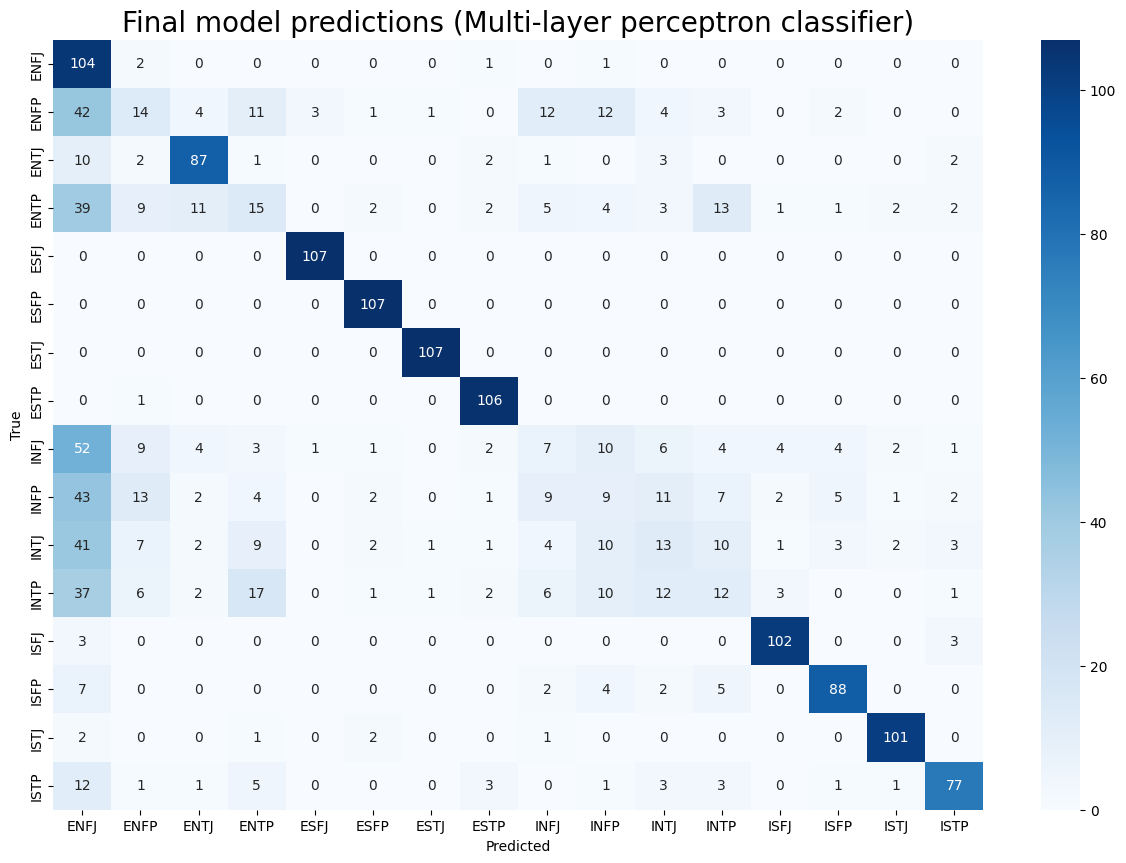

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = np.argmax(y_test, axis = 1)
y_pred_multiclass = np.argmax(y_pred, axis = 1)
cm = confusion_matrix(y_true, y_pred_multiclass)

plt.figure(figsize = (15,10))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g',
            xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Final model predictions (Multi-layer perceptron classifier)', fontsize = 20)
plt.show()

In [68]:
y_pred_df = pd.DataFrame(y_pred, columns = class_names)
y_pred_df['label'] = y_pred_df.apply(lambda x: x.idxmax(), axis = 1)
y_pred_df

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ENFJ
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ENFJ
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ENFJ
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,ESFP
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,INFP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,ESFP
1729,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ENFJ
1730,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,INFP
1731,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ENFJ


In [69]:
probs = final_model.predict_proba(X_test)
probs_array = np.round(np.array(probs), decimals = 2)

pred_probs_df = pd.DataFrame(probs_array, columns = class_names)
pred_probs_df['y_pred'] = y_pred_df['label']
pred_probs_df['true'] = class_names[y_true]
pred_probs_df.head(15)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,y_pred,true
0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.10,0.00,0.13,0.00,0.00,0.0,0.00,ENFJ,ISTP
1,0.0,0.00,0.06,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.12,ENFJ,ENFP
2,1.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,ENFJ,ENFJ
3,0.0,0.00,0.00,0.00,0.02,0.74,0.0,0.00,0.00,0.00,0.00,0.08,0.00,0.41,0.0,0.00,ESFP,INFJ
4,0.0,0.00,0.00,0.07,0.43,0.00,0.0,0.00,0.00,0.51,0.00,0.00,0.00,0.00,0.0,0.00,INFP,ENFP
5,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,ISTP,ISTP
6,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,ESTP,ESTP
7,0.0,0.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,ENTJ,ENTJ
8,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35,0.15,0.0,0.00,ENFJ,INFP
9,0.0,0.01,0.00,0.00,0.00,0.60,0.0,0.05,0.00,0.00,0.00,0.01,0.00,0.00,0.0,0.00,ESFP,ENTP


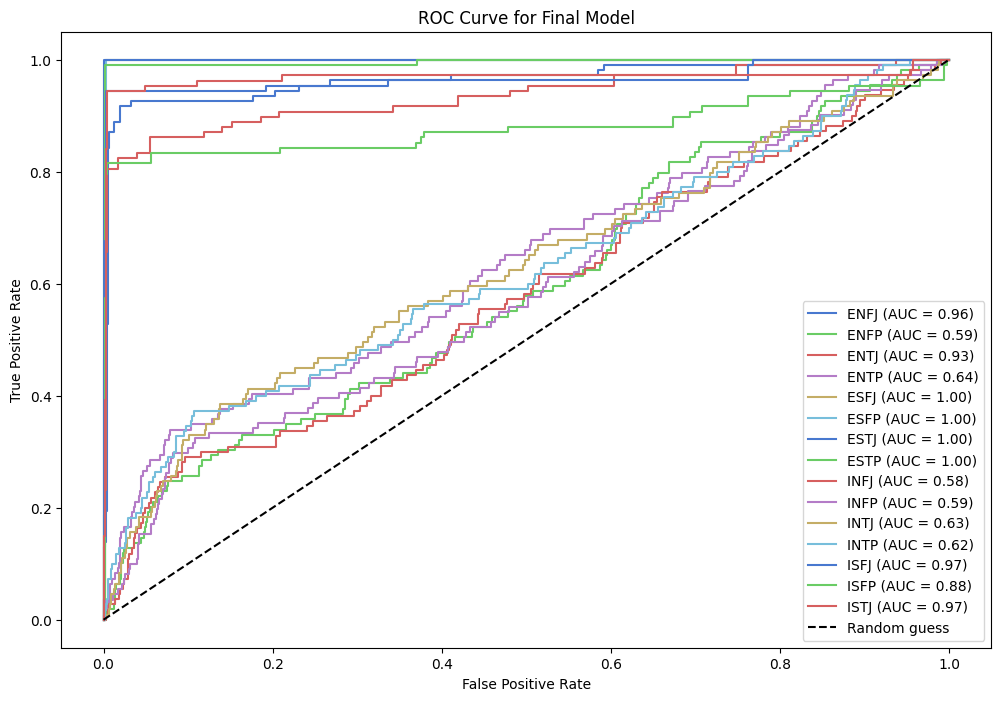

In [300]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize
y_test_bin = label_binarize(y_test, classes = class_names)

# Compute curve and AUC for every class
y_score = final_model.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,15):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
plt.figure(figsize = (12,8))

for i in range(0,15):
    plt.plot(fpr[i], tpr[i], label = f'{class_names[i]} (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--', label = 'Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Final Model')
plt.legend(loc = "lower right")
plt.show();

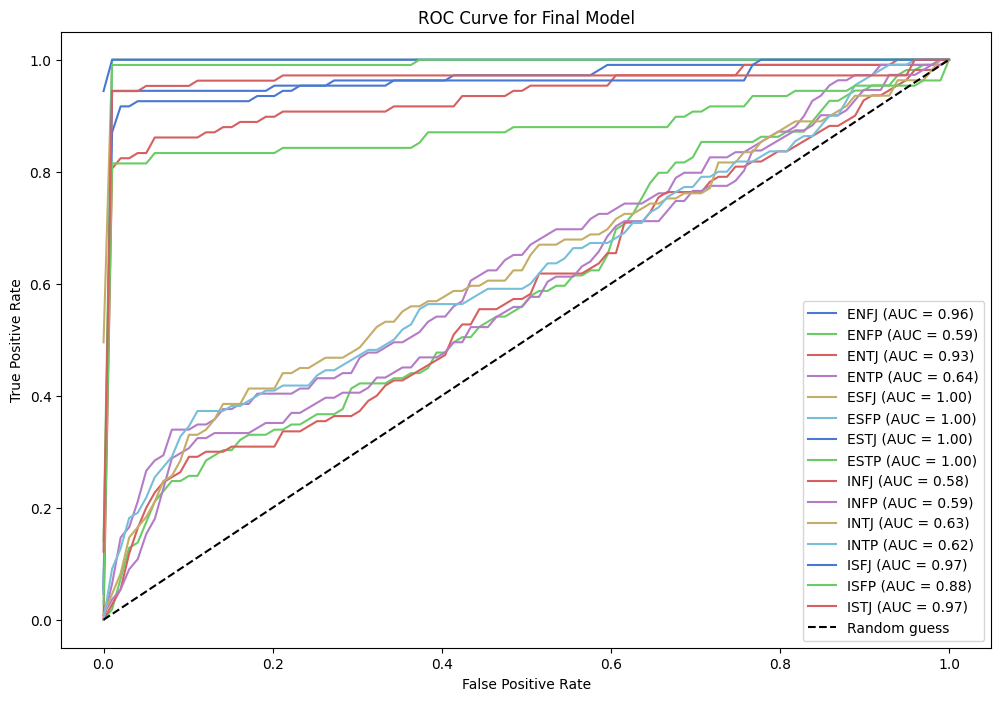

In [303]:
from scipy.interpolate import interp1d

plt.figure(figsize = (12,8))

for i in range(0,15):
    fpr_interp = np.linspace(0, 1, 100)
    tpr_interp = interp1d(fpr[i], tpr[i])(fpr_interp)
    plt.plot(fpr_interp, tpr_interp, label=f'{class_names[i]} (AUC = {roc_auc[i]:0.2f})')
    
plt.plot([0, 1], [0, 1], 'k--', label = 'Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Final Model')
plt.legend(loc = "lower right")
plt.show();

In [114]:
y_test == class_names[c]

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8151,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2816,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5534,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8529,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3193,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6425,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


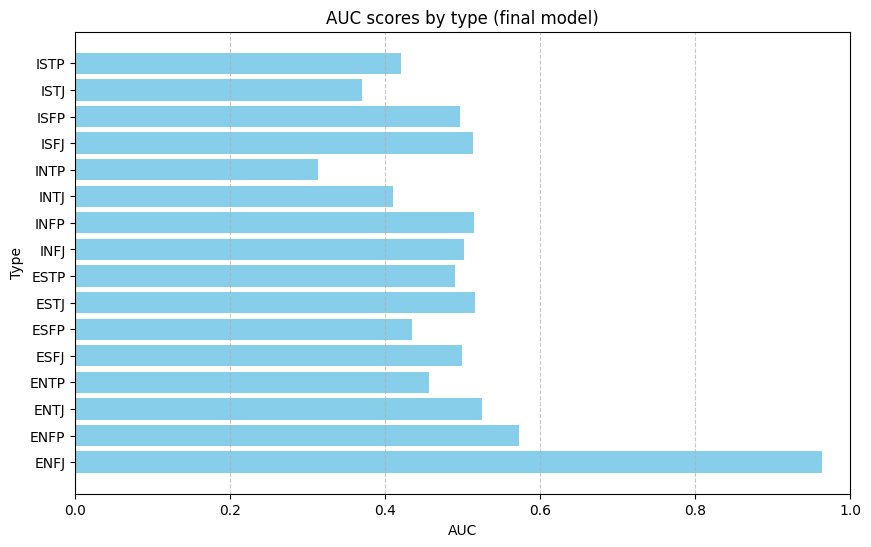

In [123]:
from sklearn.metrics import roc_auc_score

auc_scores = []
for c in range(len(class_names)):
    auc = roc_auc_score(y_test, probs[:, c][:, np.newaxis])
    auc_scores.append(auc)

plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(class_names)), auc_scores, color='skyblue')

# Add labels and title
plt.xlabel('AUC')
plt.ylabel('Type')
plt.title('AUC scores by type (final model)')
plt.yticks(np.arange(len(class_names)), class_names)

# Show plot
plt.xlim(0, 1)  # Set the y-axis limit to 0-1 for AUC scores
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.show()

# Return to hyperparameter tuning using balanced accuracy

In [167]:
# Custom scoring function so balanced accuracy will work
def ba_score(y_true, y_pred):
    y_true = np.argmax(y_true, axis = 1)
    y_pred = np.argmax(y_pred, axis = 1)
    return balanced_accuracy_score(y_true, y_pred)

In [168]:
# Random Forest hyperparameter tuning
rf2 = RandomForestClassifier(random_state = 17)

param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt'],
              'bootstrap': [True, False]}

rf_gs2 = GridSearchCV(estimator = rf2, param_grid = param_grid, scoring = make_scorer(ba_score),
                     cv = 5, n_jobs = -1)
rf_gs2.fit(X_train, y_train)

print("Best parameters found:", rf_gs2.best_params_)
print("Best cross-validation score:", rf_gs2.best_score_)

Best parameters found: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.5539872681859581


In [170]:
rf2 = RandomForestClassifier(max_features = 'sqrt', n_estimators = 200, random_state = 17)
rf2.fit(X_train2, y_train2)

print(f"Accuracy on train set: {rf2.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {rf2.score(X_test2, y_test2):.4f}")

Accuracy on train set: 1.0000
Accuracy on test set: 0.5357


In [175]:
# MLP Classifier hyperparameter tuning
nnet = MLPClassifier(random_state = 17)

param_grid = {'hidden_layer_sizes': [(50,), (100,), (100,50)],
              'activation': ['relu', 'tanh', 'logistic'],
              'alpha': [0.0001, 0.001],
              'learning_rate': ['constant', 'adaptive', 'invscaling'],
              'max_iter': [10000, 15000],
              'early_stopping': [True, False]}

nnet_gs = GridSearchCV(estimator = nnet, param_grid = param_grid, cv = 3, n_jobs = -1)
nnet_gs.fit(X_train2, y_train2)

print("Best parameters found:", nnet_gs.best_params_)
print("Best cross-validation score:", nnet_gs.best_score_)

Best parameters found: {'activation': 'relu', 'alpha': 0.0001, 'early_stopping': False, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'max_iter': 10000}
Best cross-validation score: 0.513888888888889


In [176]:
nnet2 = MLPClassifier(hidden_layer_sizes = (100, 50), max_iter = 10000, random_state = 17)
nnet2.fit(X_train2, y_train2)

print(f"Accuracy on train set: {nnet2.score(X_train2, y_train2):.4f}")
print(f"Accuracy on test set: {nnet2.score(X_test2, y_test2):.4f}")

Accuracy on train set: 0.7897
Accuracy on test set: 0.5797


# Final model 2

In [177]:
final_mod = nnet2

In [178]:
y_pred = final_mod.predict(X_test)

y_pred_argmax = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

balanced_accuracy_score(y_true, y_pred_argmax)

0.5769701295380795

# Balanced accuracy: 57.7%

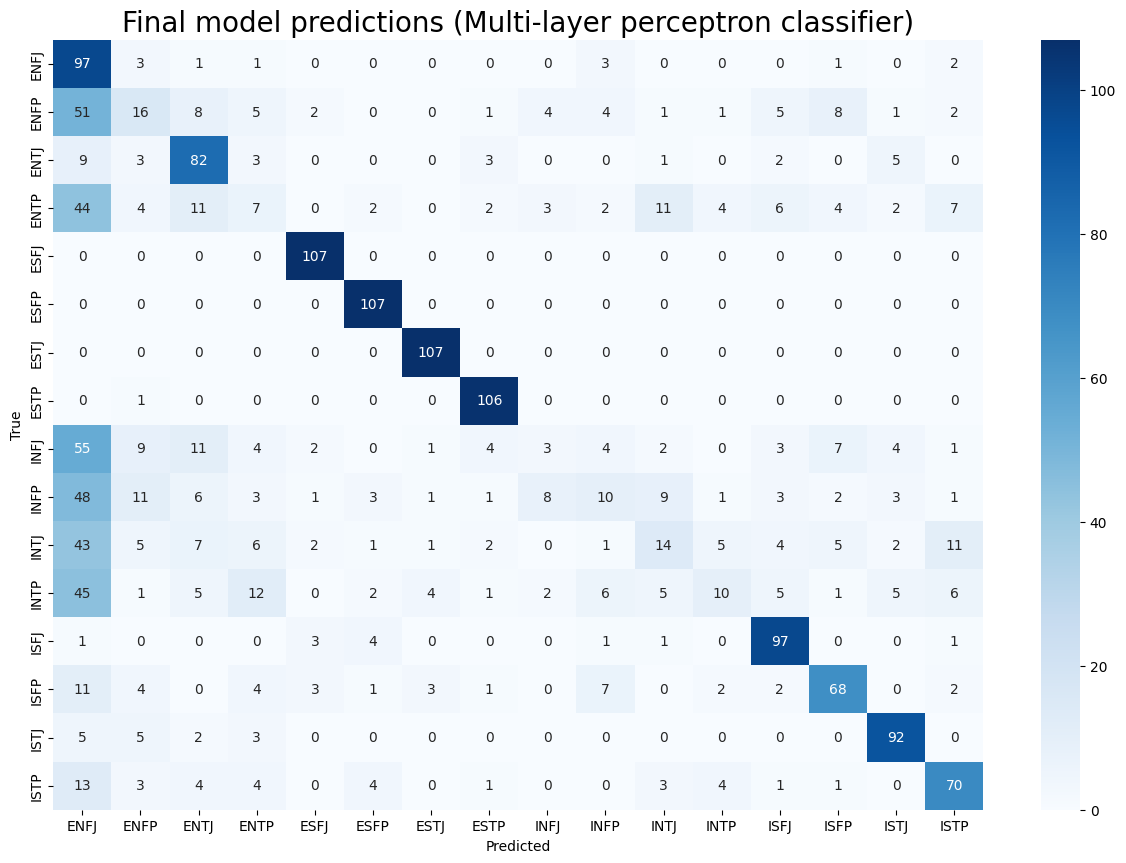

In [179]:
cm = confusion_matrix(y_true, y_pred_argmax)

plt.figure(figsize = (15,10))
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'g',
            xticklabels = class_names, yticklabels = class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Final model predictions (Multi-layer perceptron classifier)', fontsize = 20)
plt.show()

Like final model 1, final model 2 overpredicts ENFJ class. Confuses it most with classes ENFP, ENTP, INFJ, INFP, INTJ, INTP.
Also same as final model 1, final model 2 does best with ESFJ, ESFP, ESTJ, and ESTP.

In [181]:
cr_dict = classification_report(y_test, y_pred, target_names = class_names, output_dict = True)
report = pd.DataFrame(cr_dict)
report.round(decimals = 2)

/Users/ali/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,micro avg,macro avg,weighted avg,samples avg
precision,0.64,0.26,0.59,0.15,0.88,0.84,0.86,0.83,0.16,0.36,0.24,0.39,0.71,0.61,0.73,0.58,0.63,0.55,0.55,0.57
recall,0.81,0.17,0.78,0.09,1.00,1.00,1.00,0.99,0.04,0.20,0.16,0.15,0.91,0.63,0.91,0.69,0.59,0.60,0.59,0.59
f1-score,0.72,0.21,0.67,0.11,0.93,0.91,0.92,0.91,0.06,0.26,0.19,0.22,0.80,0.62,0.81,0.63,0.61,0.56,0.56,0.58
support,108.00,109.00,108.00,109.00,107.00,107.00,107.00,107.00,110.00,111.00,109.00,110.00,108.00,108.00,107.00,108.00,1733.00,1733.00,1733.00,1733.00


Performance on all classes is generally the same as final model 1.

In [197]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(class_names)

y_true_str = label_encoder.inverse_transform(y_true)
y_pred_str = label_encoder.inverse_transform(y_pred_argmax)

In [232]:
from collections import Counter

Counter(y_pred_str), Counter(y_true_str)

(Counter({'ESFP': 124,
          'ENFJ': 422,
          'ISTP': 103,
          'ESTP': 122,
          'ENTJ': 137,
          'ISFJ': 128,
          'ISFP': 97,
          'ENFP': 65,
          'ENTP': 52,
          'ESFJ': 120,
          'ISTJ': 114,
          'INFJ': 20,
          'INFP': 38,
          'INTP': 27,
          'ESTJ': 117,
          'INTJ': 47}),
 Counter({'ISTP': 108,
          'ENFP': 109,
          'ENFJ': 108,
          'INFJ': 110,
          'ESTP': 107,
          'ENTJ': 108,
          'INFP': 111,
          'ENTP': 109,
          'ISFJ': 108,
          'INTP': 110,
          'ISFP': 108,
          'ESFP': 107,
          'ESFJ': 107,
          'ISTJ': 107,
          'INTJ': 109,
          'ESTJ': 107}))

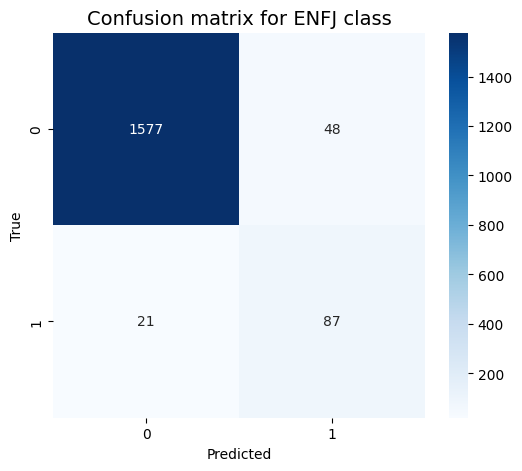

In [233]:
# True vs. predicted ENFJ labels
y_true_enfj = y_test.iloc[:, 0].values  # Assuming ENFJ is the first class
y_pred_enfj = y_pred[:, 0]

# Compute the confusion matrix
cm = confusion_matrix(y_true_enfj, y_pred_enfj)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix for ENFJ class', fontsize=14)
plt.show()

Recognizes not-ENFJs. Accurate predictions still outnumber errors by a small margin (87-69 = 18).

In [240]:
probs = final_mod.predict_proba(X_test)
probs_array = np.round(np.array(probs), decimals = 2)

pred_probs_df = pd.DataFrame(probs_array, columns = class_names)
pred_probs_df['prediction'] = y_pred_df['label']
pred_probs_df['truth'] = class_names[y_true]
pred_probs_df.head(15)

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP,prediction,truth
0,0.0,0.28,0.00,0.00,0.0,0.98,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,ENFJ,ISTP
1,1.0,0.25,0.00,0.36,0.0,0.00,0.00,0.00,0.01,0.00,0.02,0.17,0.00,0.00,0.06,0.00,ENFJ,ENFP
2,1.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.01,0.03,0.00,0.08,0.00,0.00,0.00,0.00,ENFJ,ENFJ
3,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.42,0.08,0.00,0.00,0.00,0.00,0.00,0.00,ESFP,INFJ
4,1.0,0.67,0.00,0.01,0.0,0.00,0.00,0.00,0.06,0.43,0.00,0.00,0.00,0.00,0.00,0.00,INFP,ENFP
5,0.0,0.02,0.00,0.00,0.0,0.00,0.00,0.00,0.04,0.06,0.00,0.00,0.02,0.00,0.00,0.78,ISTP,ISTP
6,0.0,0.00,0.01,0.00,0.0,0.04,0.03,0.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,ESTP,ESTP
7,0.0,0.00,0.99,0.10,0.0,0.03,0.00,0.00,0.10,0.00,0.00,0.02,0.00,0.00,0.00,0.00,ENTJ,ENTJ
8,0.0,0.06,0.00,0.00,0.0,0.00,0.00,0.00,0.09,0.28,0.00,0.00,1.00,0.00,0.00,0.00,ENFJ,INFP
9,0.0,0.00,0.01,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.52,ESFP,ENTP


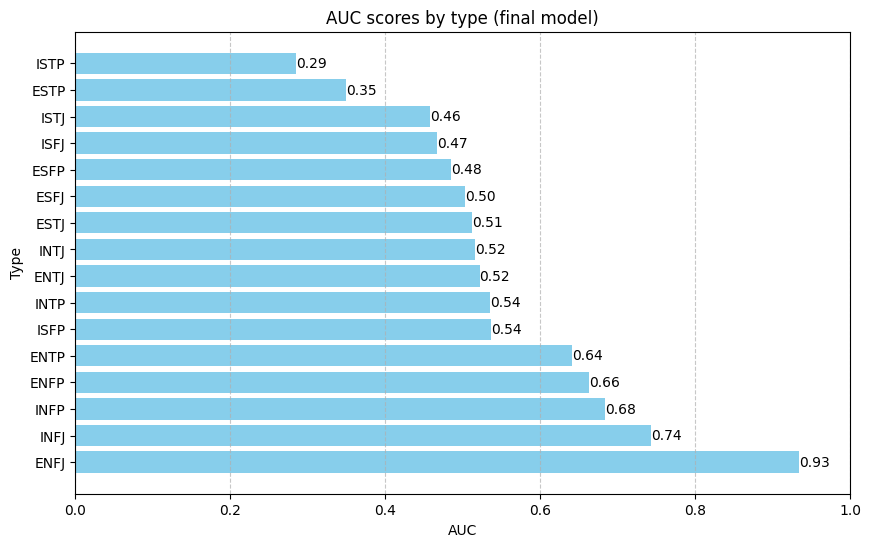

In [243]:
from sklearn.metrics import roc_auc_score

# Calculate AUC scores
auc_scores = []
for c in range(len(class_names)):
    auc = roc_auc_score(y_test, probs[:, c][:, np.newaxis])
    auc_scores.append(auc)

# Sort AUC scores and labels in descending order
sorted_indices = sorted(range(len(auc_scores)), key=lambda i: auc_scores[i], reverse=True)
sorted_class_names = [class_names[i] for i in sorted_indices]
sorted_auc_scores = [auc_scores[i] for i in sorted_indices]

# Bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_class_names)), sorted_auc_scores, color='skyblue')

# Add labels and title
plt.xlabel('AUC')
plt.ylabel('Type')
plt.title('AUC scores by type (final model)')
plt.yticks(range(len(sorted_class_names)), sorted_class_names)

# Add AUC scores on the bars
for bar, auc_score in zip(bars, sorted_auc_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{auc_score:.2f}', 
             va='center', ha='left')

plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

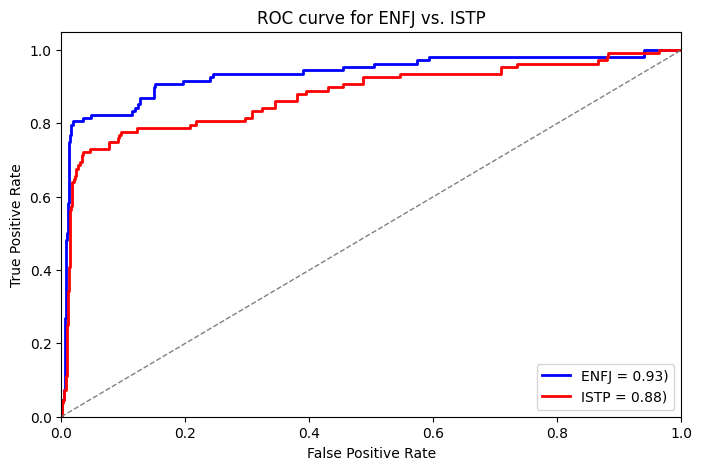

In [255]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for ENFJ class
fpr, tpr, _ = roc_curve(y_test.iloc[:, 0], probs[:, 0])  # Assuming ENFJ is the first class
roc_auc_value = auc(fpr, tpr)

# Compute ROC curve and ROC area for ISTP class
fpr_istp, tpr_istp, _ = roc_curve(y_test.iloc[:, 15], probs[:, 15])  # Assuming ISTP is the 16th class
roc_auc_value_istp = auc(fpr_istp, tpr_istp)

# Plot ROC curve
plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ENFJ = %0.2f)' % roc_auc_value)
plt.plot(fpr_istp, tpr_istp, color='red', lw=2, label='ISTP = %0.2f)' % roc_auc_value_istp)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for ENFJ vs. ISTP')
plt.legend(loc="lower right")
plt.show()

Although the model overpredicts on ENFJ the ROC-AUC score is actually fairly high. ISTP has a relatively high ROC-AUC score as well but suffers more when computed against lower thresholds.